In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../../')

from pygolfdata.data import shotlink 

%matplotlib inline

In [2]:
#Load 2016 data

df_2016 = shotlink.get_combined_data_from_file(
    '../../../golf_course_project_data/combined_shots_and_weather_2016_2016.csv')

In [3]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141966 entries, 0 to 1141965
Data columns (total 65 columns):
TourCode                   1141966 non-null category
TourDescription            1141966 non-null category
Year                       1141966 non-null uint16
TournamentNum              1141966 non-null uint16
PlayerNum                  1141966 non-null uint16
CourseNum                  1141966 non-null uint16
PermanentTournamentNum     1141966 non-null uint16
PlayerFirstName            1141966 non-null category
PlayerLastName             1141966 non-null category
Round                      1141966 non-null uint8
TournamentName             1141966 non-null category
CourseName_shots           1141966 non-null object
Hole                       1141966 non-null uint8
HoleScore                  1141601 non-null float32
ParValue                   1141966 non-null uint8
Yardage                    1141966 non-null uint16
Shot                       1141966 non-null uint8
ShotType     

In [4]:
df_2016['PrecipitationType'].value_counts()

None    950011
rain    191955
Name: PrecipitationType, dtype: int64

In [8]:
df_2016['PrecipitationType'].cat.categories

Index(['rain'], dtype='object')

In [11]:
df_2016['PrecipitationType'] = df_2016['PrecipitationType'].cat.add_categories(['None'])

In [12]:
df_2016['PrecipitationType'].cat.categories

Index(['rain', 'None'], dtype='object')

In [14]:
df_2016['PrecipitationType'].fillna('None', inplace = True)

In [15]:
df_2016['PrecipitationType'].value_counts()

None    950011
rain    191955
Name: PrecipitationType, dtype: int64

**Need to change PrecipitationType to include 'None' instead of a null value for no rain**

In [24]:
def plot_strokes_gained_scatter(df, x_var, by_cat = True):
    if by_cat == True:
        sns.lmplot(x = x_var, y = 'StrokesGainedBaseline', col = 'StrokesGainedCategory', data = df,
          fit_reg = False)
    else:
        sns.lmplot(x = x_var, y = 'StrokesGainedBaseline', data = df, fit_reg = False)

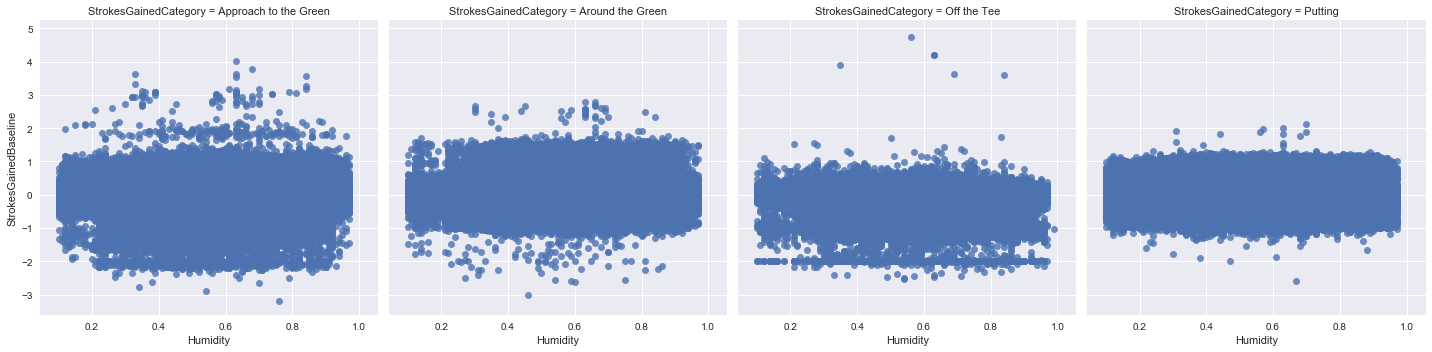

In [25]:
plot_strokes_gained_scatter(df_2016, 'Humidity')

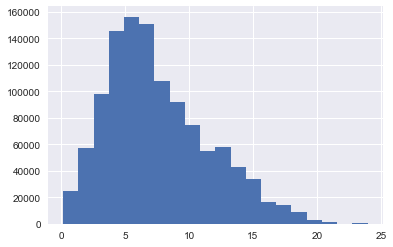

In [23]:
df_2016['WindSpeed'].hist(bins = 20)

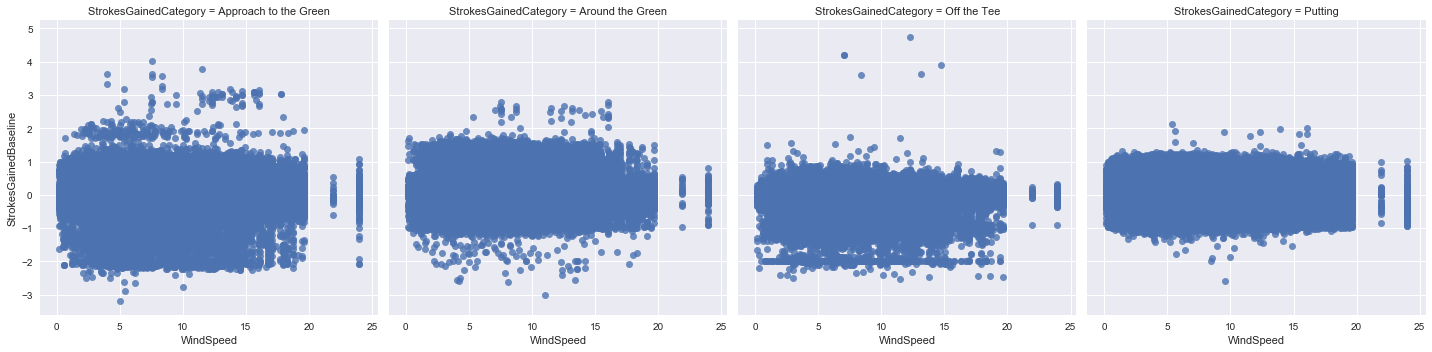

In [26]:
plot_strokes_gained_scatter(df_2016, 'WindSpeed')

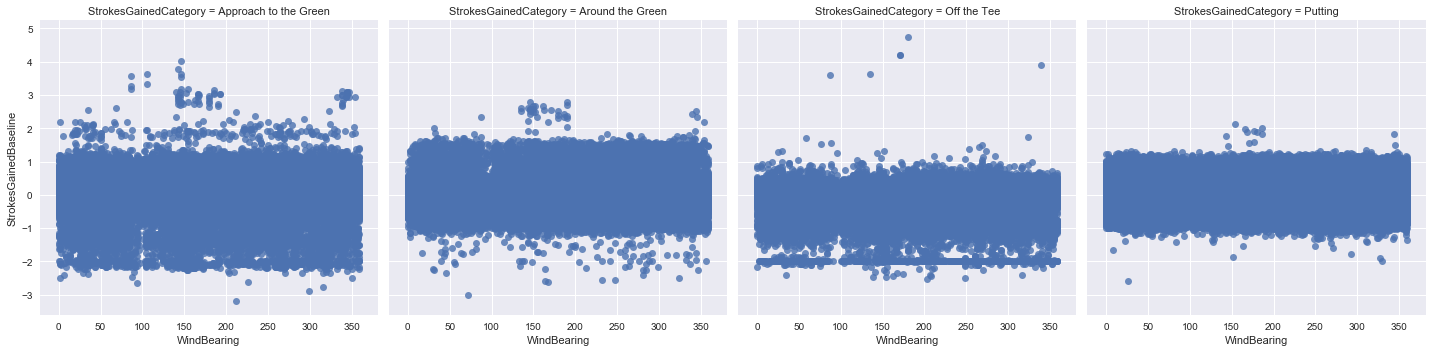

In [27]:
plot_strokes_gained_scatter(df_2016, 'WindBearing')

In [28]:
df_2016['CourseName_weather'].value_counts()

Baltusrol GC                      34325
Quail Hollow Club                 34279
Glen Abbey GC                     34126
TPC San Antonio - AT&T Oaks       33093
TPC Southwind                     32780
TPC Four Seasons Resort           32593
TPC River Highlands               32100
PGA National (Champion)           31932
TPC Deere Run                     31877
TPC Sawgrass                      31862
Sedgefield CC                     31780
GC of Houston                     31702
Silverado CC (North)              31466
Riviera CC                        31338
Innisbrook Resort (Copperhead)    31169
Waialae CC                        30892
TPC Summerlin                     30735
Harbour Town GL                   30352
El Camaleon GC                    29895
RTJ Trail (Grand National)        29092
TPC Scottsdale                    28553
Bethpage State Park (Black)       28316
Bay Hill Club & Lodge             28216
CC of Jackson                     28216
Congressional CC (Blue)           27967


In [30]:
df_2016['AMWindDir'].value_counts()

C     251704
RL    191730
LR    190604
IW    165789
DW    147300
SW     96595
 G       283
Name: AMWindDir, dtype: int64

In [31]:
df_2016['PMWindDir'].value_counts()

RL    248085
LR    238331
IW    206307
DW    197156
C      79513
SW     74361
 G       565
Name: PMWindDir, dtype: int64

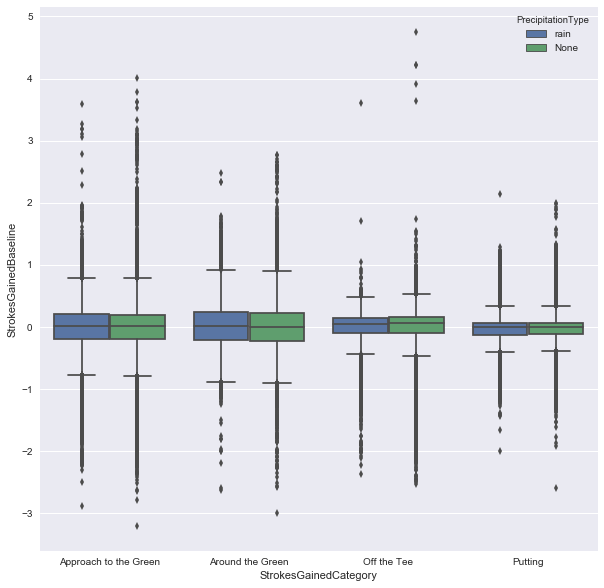

In [17]:
plt.subplots(figsize=(10,10))
sns.boxplot(x = 'StrokesGainedCategory', y = 'StrokesGainedBaseline', hue = 'PrecipitationType', data = df_2016)

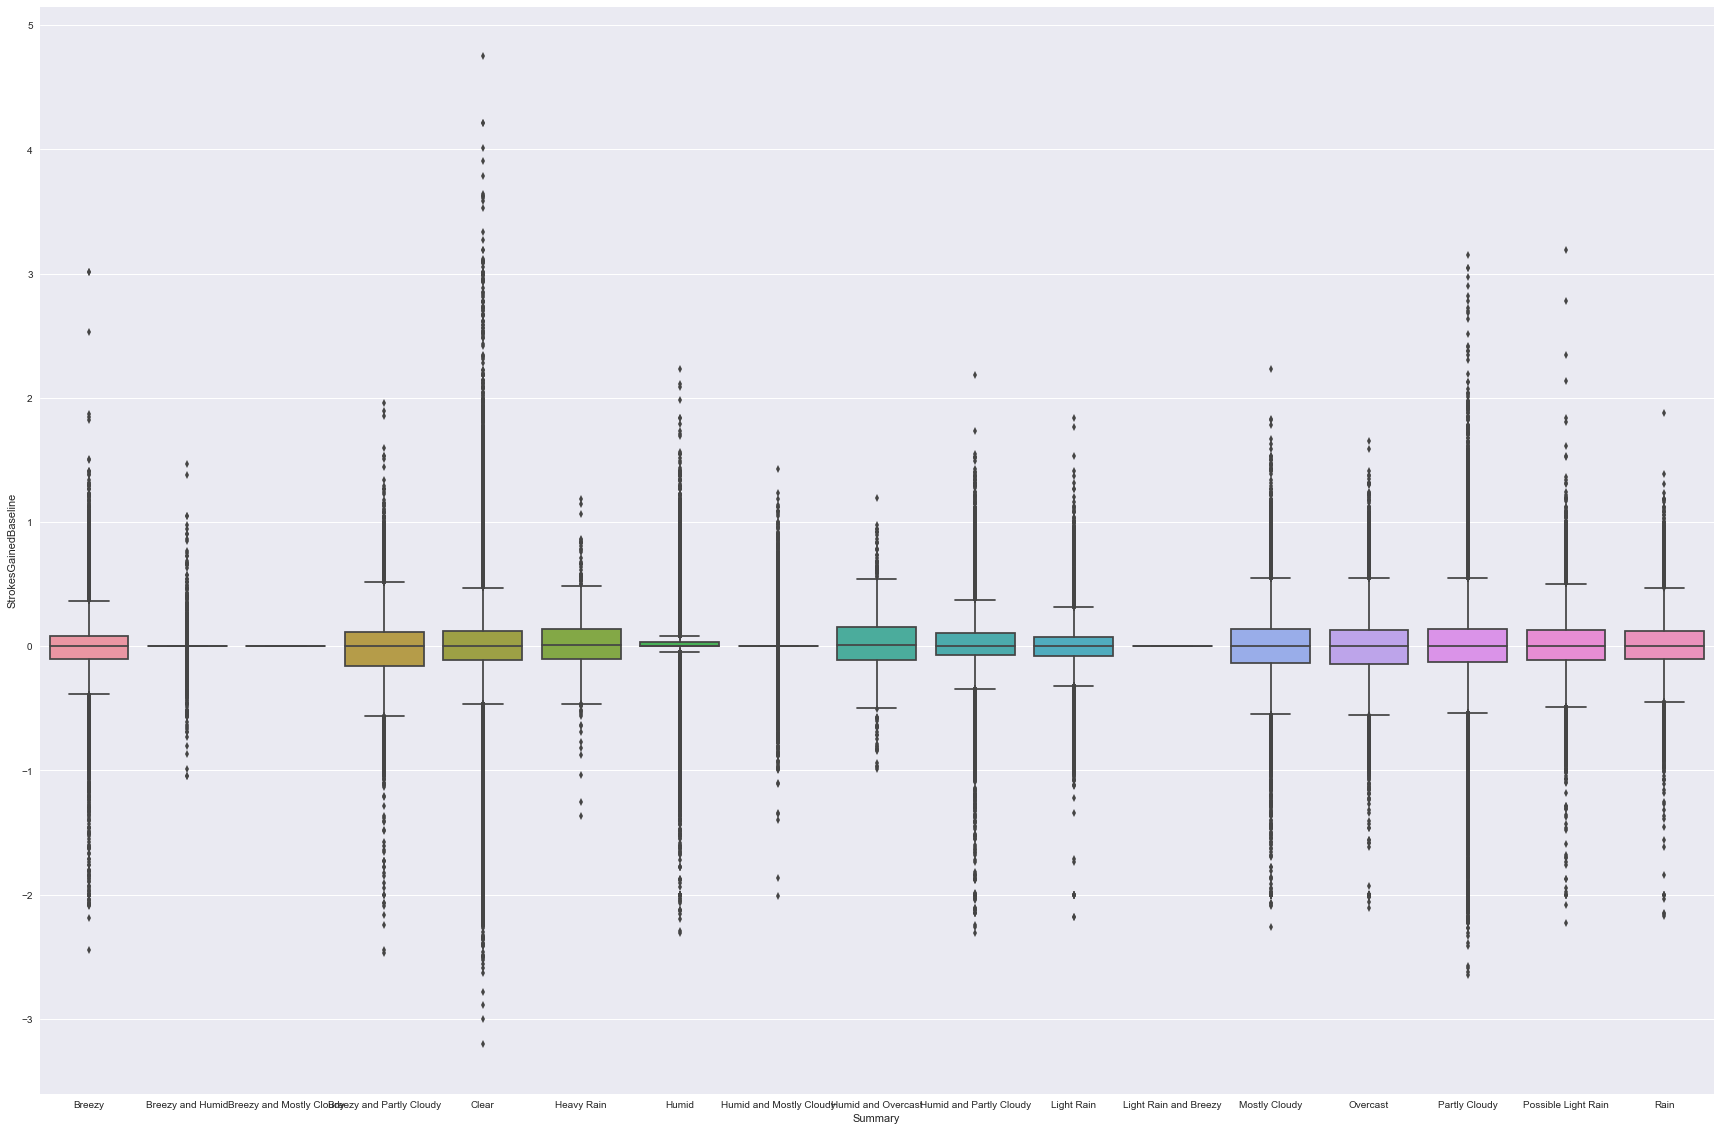

In [19]:
plt.subplots(figsize=(30,20))
sns.boxplot(x = 'Summary', y = 'StrokesGainedBaseline', data = df_2016)